# PROJET DE THEORIE DES COPULES

## Question 1
À partir des spreads de CDS des deux entreprises pour différentes
maturités, extraire les probabilités de défaut implicites.

In [1]:
##  La variable de defaut suit une loi exponentielle de paramètre lamda 

def lambda_T (spread_T, R_T):
    return spread_T/(1 + R_T)

lamba_BNP_4 = lambda_T(0.01, 0.6)
lamda_SG_4 = lambda_T(0.012,0.3)


In [3]:
import math
def proba_defaut(lambda_ , T):
    return 1 - math.exp(-lambda_ * T)

In [7]:
PD_SG_4 = proba_defaut(lamda_SG_4,4)
PD_BNP_4 = proba_defaut(lamba_BNP_4,4)
print("proba defaut SG à horizon 4 ans :", PD_SG_4, "\n Proba defaut BNP à horizon 4 ans", PD_BNP_4)

proba defaut SG à horizon 4 ans : 0.0362497328662722 
 Proba defaut BNP à horizon 4 ans 0.024690087971667385


## Question 2
Caractériser les distributions des taux de recouvrement de chacune des deux créances. 
On suppose que ces taux de recouvrement sont indépendants et qu'ils sont distribués suivant une loi beta. Leurs lois marginales les caractérisent donc complètement
 Les paramètres de cette loi sont obtenus via la méthode des moements et on a que 

In [8]:
def param_loi_beta(mu, sigma):
    a_hat = (((mu**2)*(1-mu))/(sigma**2)) - mu

    b_hat = (((mu**2)*((1-mu)**2))/(mu*(sigma)**2)) - (1-mu)

    return a_hat, b_hat

In [9]:
a_hat_SG, b_hat_SG = param_loi_beta(0.3, 0.25)
a_hat_SG, b_hat_SG

(0.708, 1.652)

In [10]:
a_hat_BNP, b_hat_BNP = param_loi_beta(0.6, 0.15)
a_hat_BNP, b_hat_BNP

(5.8, 3.8666666666666676)

In [11]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def beta_density(a, b, x):
    """
    Calcule la densité de probabilité de la loi Beta pour des paramètres a et b.
    :param x: Valeur où évaluer la densité
    """
    if a <= 0 or b <= 0:
        raise ValueError("Les paramètres a et b doivent être strictement positifs.")
    return stats.beta.pdf(x, a, b)

def plot_beta_density(a, b):
    """
    Affiche la courbe de densité de la loi Beta pour les paramètres donnés a et b
    """
    x = np.linspace(0, 1, 100)
    y = beta_density(a, b, x)
    
    plt.plot(x, y, label=f'Beta({a}, {b})')
    plt.xlabel('x')
    plt.ylabel('Densité')
    plt.title('Densité de probabilité de la loi Beta')
    plt.legend()
    plt.grid()
    plt.show()



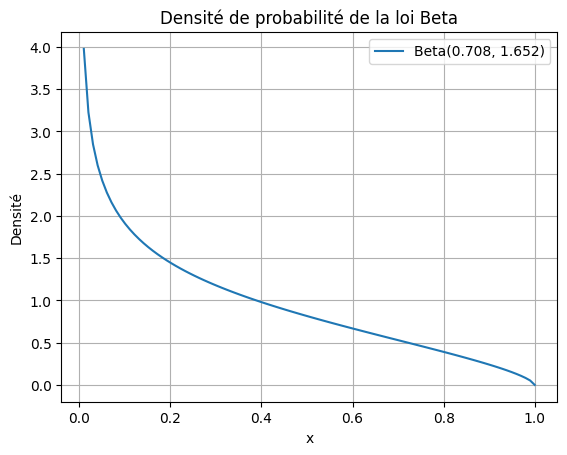

In [15]:

plot_beta_density(a_hat_SG, b_hat_SG)

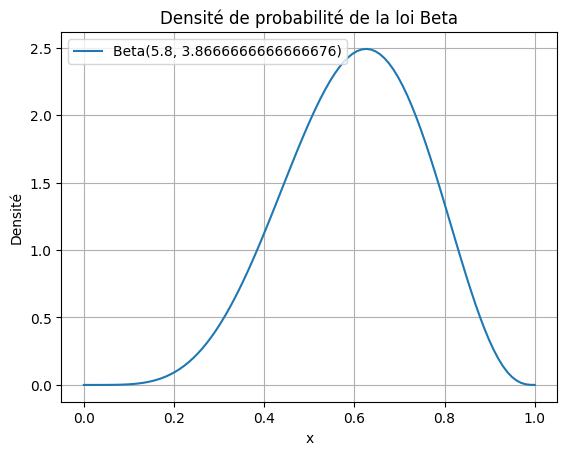

In [13]:
plot_beta_density(a_hat_BNP, b_hat_BNP)

# Q.3. On s’intéresse à l’historique des données actions. 
a. Effectuons une analyse exploratoire univariée des données actions de ces deux entreprises.

In [18]:
import pandas as pd  

data_equity = pd.read_csv("data.txt", sep="\s+", header=0)  
data_equity.head() # Affiche les premières lignes du DataFrame


,BNP,SG
0,42.36,55.24
1,42.72,55.59
2,43.20,56.45
3,42.67,55.55
4,41.81,54.50


In [22]:
## Calcul des log_ rendements 
def calculate_log_returns(data):
    """
    Calcule les log-rendements pour chaque colonne d'un DataFrame.
    
    :param data: DataFrame contenant les prix
    :return: DataFrame des log-rendements
    """
    return np.log(data / data.shift(1))
log_returns = calculate_log_returns(data_equity)
log_returns.head()

,BNP,SG
0,NaN,NaN
1,0.008463,0.006316
2,0.011173,0.015352
3,-0.012344,-0.016072
4,-0.020361,-0.019083


In [19]:
def plot_histogram_with_density(data, column):
    """
    Trace un histogramme des valeurs d'une colonne d'un DataFrame avec superposition de la densité estimée.
    
    :param data: DataFrame contenant les données
    :param column: Nom de la colonne à analyser
    """
    values = data[column].dropna()
    
    plt.figure(figsize=(8, 5))
    
    # Histogramme
    plt.hist(values, bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
    
    # Estimation de la densité (KDE)
    xmin, xmax = values.min(), values.max()
    x = np.linspace(xmin, xmax, 100)
    kde = stats.gaussian_kde(values)
    plt.plot(x, kde(x), 'r-', label='Densité estimée')
    
    plt.xlabel(column)
    plt.ylabel('Densité')
    plt.title(f'Histogramme et densité de {column}')
    plt.legend()
    plt.grid()
    plt.show()


In [27]:
import pandas as pd

def stat_desc(df, colonne):
    """
    Affiche les statistiques descriptives majeures d'une colonne d'un DataFrame, 
    """
    # Statistiques descriptives classiques
    statistiques = df[colonne].describe()
    
    # Calcul du skewness et du kurtosis
    skewness = df[colonne].skew()
    kurtosis = df[colonne].kurtosis()
    
    # Affichage des résultats
    print("Statistiques descriptives de la colonne '{}' :".format(colonne))
    print(statistiques)
    print("\nSkewness : {:.4f}".format(skewness))
    print("Kurtosis : {:.4f}".format(kurtosis))


## Statistiques descriptives pour BNP

In [28]:
stat_desc(log_returns, "BNP")

Statistiques descriptives de la colonne 'BNP' :
count    999.000000
mean      -0.000888
std        0.024441
min       -0.123524
25%       -0.013867
50%       -0.000358
75%        0.012526
max        0.083225
Name: BNP, dtype: float64

Skewness : -0.3314
Kurtosis : 2.0170


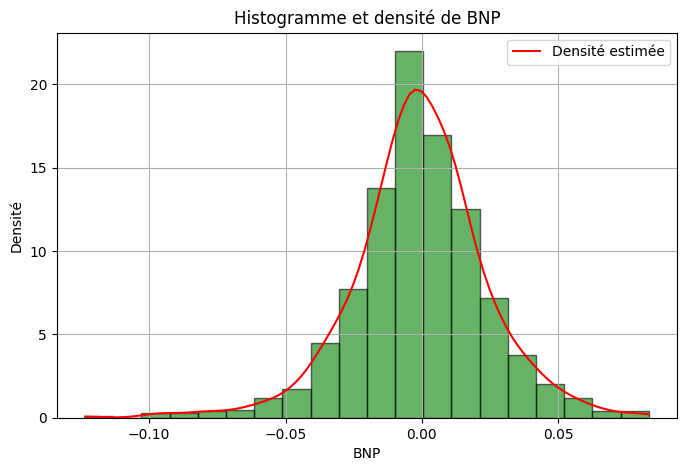

In [23]:
plot_histogram_with_density(log_returns, "BNP")

## Statistiques descriptives pour société générale

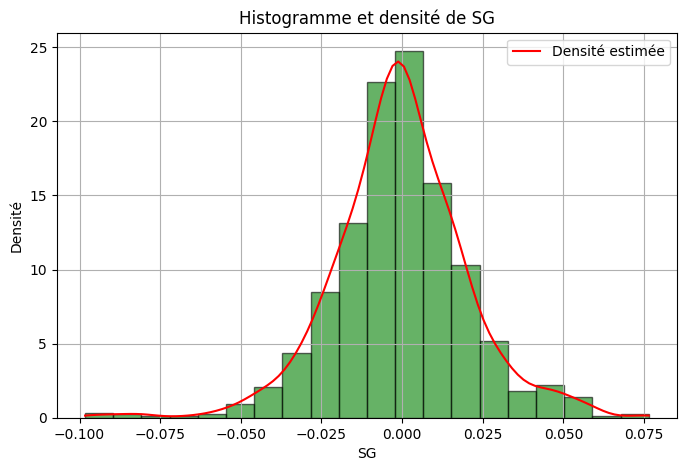

In [24]:
plot_histogram_with_density(log_returns, "SG")

In [29]:
stat_desc(log_returns, "BNP")

Statistiques descriptives de la colonne 'BNP' :
count    999.000000
mean      -0.000888
std        0.024441
min       -0.123524
25%       -0.013867
50%       -0.000358
75%        0.012526
max        0.083225
Name: BNP, dtype: float64

Skewness : -0.3314
Kurtosis : 2.0170


In [31]:
import numpy as np
import pandas as pd

# Générer un échantillon de taille 1000 à partir d'une loi normale (moyenne=0, écart-type=1)
np.random.seed(0)  # Pour la reproductibilité
data = np.random.normal(loc=0, scale=1, size=10000)

# Calcul de la kurtosis
kurtosis_value = pd.Series(data).kurtosis()

# Affichage du résultat
print("Kurtosis de la loi normale :", kurtosis_value)


Kurtosis de la loi normale : -0.030369753700771884


## 3.b Modélisons judicieusement les distributions univariées des facteurs de risques.

Dans les deux cas on observe des courbes en forme de cloche, et sensiblement symétrique, ce qui laisse présager une loi normale. Mais les kurtosis excessifs sont supérieurs à 2, ce qui laisse entrevoir une loi à queue lourde

In [38]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

def dist_normal(df, colonne):
    """
    Fitte une loi normale sur la colonne spécifiée d'un DataFrame
    et affiche un QQ plot pour comparer les données à la loi normale.

    """
    # Extraire les données de la colonne
    data = df[colonne]
    
    # Estimation des paramètres de la loi normale (moyenne et écart-type)
    mu, std = stats.norm.fit(data)
    print("les paramètres de la loi normale sont respectivement donnés pour mu et sigma par:", mu,std)
    
    # Tracer le QQ plot
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", sparams=(mu, std), plot=plt)
    plt.title(f'QQ plot de la loi normale sur {colonne}')
    plt.show()


In [39]:
#log_returns = log_returns.drop(0).reset_index(drop=True)
log_returns.head()

,BNP,SG
0,0.008463,0.006316
1,0.011173,0.015352
2,-0.012344,-0.016072
3,-0.020361,-0.019083
4,-0.004555,-0.000184


les paramètres de la loi normale sont respectivement donnés pour mu et sigma par: -0.0008875748122451863 0.024428762956053996


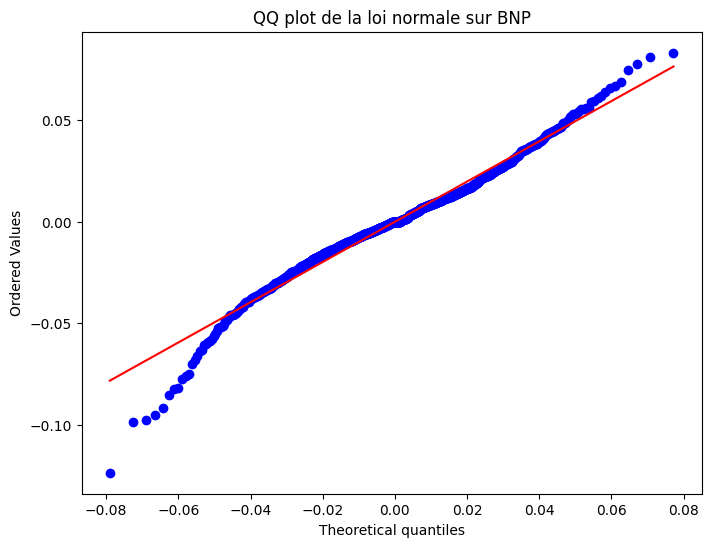

In [40]:
dist_normal(log_returns, "BNP")

In [41]:
import scipy.stats as stats

def test_ks(df, colonne, dist="norm", params=None):
    """
    Effectue un test de Kolmogorov-Smirnov pour tester l'adéquation des données
    à une distribution théorique (par défaut la loi normale).
    dist (str): La distribution théorique à tester contre les données (par défaut 'norm' pour loi normale).
    params (tuple): Les paramètres de la distribution théorique (par exemple, (mu, std) pour une loi normale).
    """
    data = df[colonne]
    
    # ajuster la distribution
    if params is None:
        params = stats.__dict__[dist].fit(data)  # Ajuste les paramètres de la distribution théorique
    
    # Effectuer le test KS
    stat, p_value = stats.kstest(data, dist, args=params)
    
    # Afficher les résultats du test
    print(f"Statistique de Kolmogorov-Smirnov : {stat:.4f}")
    print(f"P-value : {p_value:.4f}")
    
    # Interprétation
    if p_value > 0.05:
        print("Les données suivent la distribution théorique (H0 non rejetée).")
    else:
        print("Les données ne suivent pas la distribution théorique (H0 rejetée).")


In [43]:
# Effectuer le test KS sur la colonne 'log_returns' contre la loi uniforme
test_ks(log_returns,"BNP", dist="uniform")


Statistique de Kolmogorov-Smirnov : 0.3602
P-value : 0.0000
Les données ne suivent pas la distribution théorique (H0 rejetée).


In [47]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

def dist_student(df, colonne):
    """
    Fitte une loi t de Student généralisée sur la colonne spécifiée d'un DataFrame
    et affiche un QQ plot pour comparer les données à la loi t de Student.
    
    Parameters:
    df (pd.DataFrame): Le DataFrame contenant les données.
    colonne (str): Le nom de la colonne à utiliser pour fitter la loi t de Student.
    """
    # Extraire les données de la colonne
    data = df[colonne]
    
    # Estimation des paramètres de la loi t de Student (degrés de liberté, loc, scale)
    df, loc, scale = stats.t.fit(data)  # Ajuste les paramètres sans spécifier 'df' directement
    print("Les paramètres de la loi t de Student sont respectivement donnés pour les degrés de liberté, loc, et scale par:", df, loc, scale)
    
    # Tracer le QQ plot pour la loi t de Student
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="t", sparams=(df, loc, scale), plot=plt)
    plt.title(f'QQ plot de la loi t de Student sur {colonne}')
    plt.show()


Les paramètres de la loi t de Student sont respectivement donnés pour les degrés de liberté, loc, et scale par: 4.533338720756336 -0.0005074695555053017 0.018689382669796424


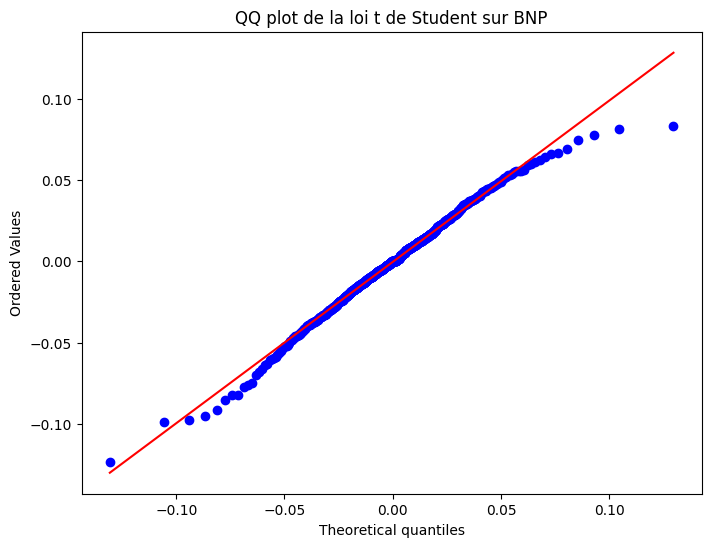

In [49]:
dist_student(log_returns, "BNP")

Les paramètres de la loi t de Student sont respectivement donnés pour les degrés de liberté, loc, et scale par: 4.593386840675238 -0.0007195989003699775 0.015899579097371608


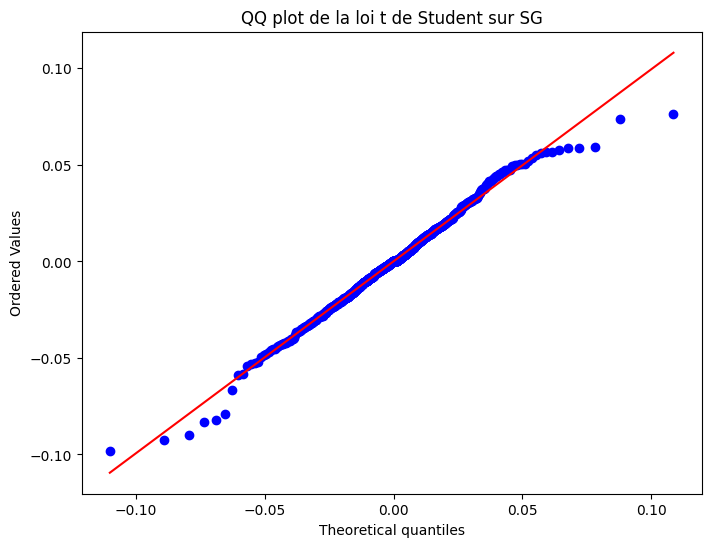

In [52]:
dist_student(log_returns, "SG")

In [50]:
import scipy.stats as stats

def ks_test_student(df, colonne):
    """
    Effectue un test de Kolmogorov-Smirnov (KS-test) pour tester l'adéquation des données
    à une loi t de Student généralisée.
    """
    data = df[colonne]
    
    # Estimation des paramètres de la loi t de Student (degrés de liberté, loc, scale)
    df_param, loc, scale = stats.t.fit(data)  # Ajuste les paramètres de la loi t avec les degrés de liberté, loc et scale
    print(f"Les paramètres estimés de la loi t de Student sont : df = {df_param}, loc = {loc}, scale = {scale}")
    
    # Effectuer le test KS
    stat, p_value = stats.kstest(data, 't', args=(df_param, loc, scale))
    print(f"Statistique de Kolmogorov-Smirnov : {stat:.4f}")
    print(f"P-value : {p_value:.4f}")
    
    # Interprétation
    if p_value > 0.05:
        print("Les données suivent la loi t de Student (H0 non rejetée).")
    else:
        print("Les données ne suivent pas la loi t de Student (H0 rejetée).")


In [51]:
ks_test_student(log_returns, "BNP")

Les paramètres estimés de la loi t de Student sont : df = 4.533338720756336, loc = -0.0005074695555053017, scale = 0.018689382669796424
Statistique de Kolmogorov-Smirnov : 0.0263
P-value : 0.4869
Les données suivent la loi t de Student (H0 non rejetée).


In [53]:
ks_test_student(log_returns, "SG")

Les paramètres estimés de la loi t de Student sont : df = 4.593386840675238, loc = -0.0007195989003699775, scale = 0.015899579097371608
Statistique de Kolmogorov-Smirnov : 0.0249
P-value : 0.5593
Les données suivent la loi t de Student (H0 non rejetée).


## Q.4. Etudions la structure de dépendance  entre les facteurs de risques sur la base de critères non paramétriques.

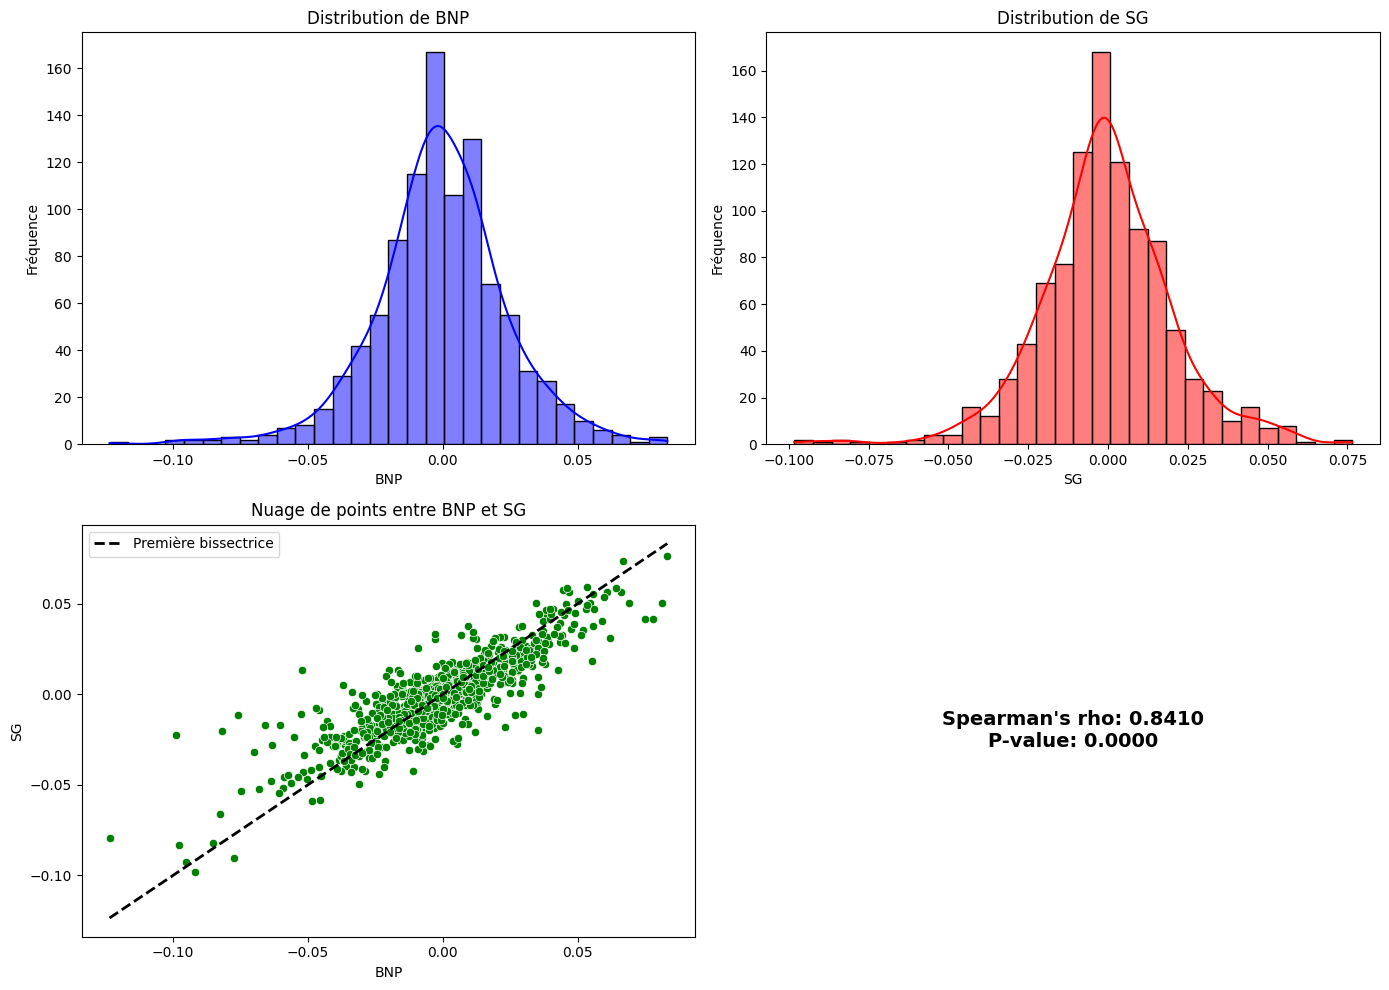

Coefficient de corrélation de Spearman entre BNP et SG : 0.8410
P-value : 0.0000
Il y a une relation monotone significative entre les deux variables.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def model_dependence(df, var1, var2):
    """
    Modélise la structure de dépendance entre deux variables en affichant :
    1. Les distributions des deux variables.
    2. Les nuages de points avec la corrélation de Spearman.
    
    Parameters:
    df (pd.DataFrame): Le DataFrame contenant les données.
    var1 (str): Le nom de la première variable (ex. 'BNP').
    var2 (str): Le nom de la deuxième variable (ex. 'SG').
    """
    # Calculer le coefficient de corrélation de Spearman
    corr_spearman, p_value = stats.spearmanr(df[var1], df[var2])

    # Afficher tout sur un seul graphique
    plt.figure(figsize=(14, 10))

    # 1. Afficher les distributions des deux variables
    plt.subplot(2, 2, 1)
    sns.histplot(df[var1], kde=True, color='blue', bins=30)
    plt.title(f'Distribution de {var1}')
    plt.xlabel(var1)
    plt.ylabel('Fréquence')

    plt.subplot(2, 2, 2)
    sns.histplot(df[var2], kde=True, color='red', bins=30)
    plt.title(f'Distribution de {var2}')
    plt.xlabel(var2)
    plt.ylabel('Fréquence')

    # 2. Tracer les nuages de points (scatter plot)
    plt.subplot(2, 2, 3)
    sns.scatterplot(x=df[var1], y=df[var2], color='green')
    plt.title(f'Nuage de points entre {var1} et {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    
    # Tracer la première bissectrice (y = x)
    min_val = min(df[var1].min(), df[var2].min())
    max_val = max(df[var1].max(), df[var2].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=2, label="Première bissectrice")
    plt.legend()

    # 3. Afficher le coefficient de corrélation de Spearman dans un sous-graphique
    plt.subplot(2, 2, 4)
    plt.axis('off')  # Désactive les axes
    plt.text(0.5, 0.5, f"Spearman's rho: {corr_spearman:.4f}\nP-value: {p_value:.4f}", 
             fontsize=14, ha='center', va='center', color='black', weight='bold')

    # Ajuster l'affichage et afficher
    plt.tight_layout()
    plt.show()
    
    # Interprétation du coefficient de Spearman
    print(f"Coefficient de corrélation de Spearman entre {var1} et {var2} : {corr_spearman:.4f}")
    print(f"P-value : {p_value:.4f}")
    if p_value < 0.05:
        print("Il y a une relation monotone significative entre les deux variables.")
    else:
        print("Il n'y a pas de relation monotone significative entre les deux variables.")
    
# Exemple d'utilisation avec les colonnes 'BNP' et 'SG'
model_dependence(log_returns, 'BNP', 'SG')


In [ ]:
La structure de dépendance entre SG et BNP se caractérise par une forte relation monotone positive, comme l'indique un coefficient de Spearman d'environ 0,84. Le nuage de points montre que leurs variations évoluent de concert, y compris dans les extrêmes, ce qui traduit une dépendance de queue positive.